In [1]:
import pandas as pd
data = pd.read_csv(r'C:\Users\abc\Downloads\YearPredictionMSD.txt (1)\YearPredictionMSD.txt',header=None)
data

,0,1,2,3,4,5,6,7,8,9,...,81,82,83,84,85,86,87,88,89,90
0,2001,49.94357,21.47114,73.07750,8.74861,-17.40628,-13.09905,-25.01202,-12.23257,7.83089,...,13.01620,-54.40548,58.99367,15.37344,1.11144,-23.08793,68.40795,-1.82223,-27.46348,2.26327
1,2001,48.73215,18.42930,70.32679,12.94636,-10.32437,-24.83777,8.76630,-0.92019,18.76548,...,5.66812,-19.68073,33.04964,42.87836,-9.90378,-32.22788,70.49388,12.04941,58.43453,26.92061
2,2001,50.95714,31.85602,55.81851,13.41693,-6.57898,-18.54940,-3.27872,-2.35035,16.07017,...,3.03800,26.05866,-50.92779,10.93792,-0.07568,43.20130,-115.00698,-0.05859,39.67068,-0.66345
3,2001,48.24750,-1.89837,36.29772,2.58776,0.97170,-26.21683,5.05097,-10.34124,3.55005,...,34.57337,-171.70734,-16.96705,-46.67617,-12.51516,82.58061,-72.08993,9.90558,199.62971,18.85382
4,2001,50.97020,42.20998,67.09964,8.46791,-15.85279,-16.81409,-12.48207,-9.37636,12.63699,...,9.92661,-55.95724,64.92712,-17.72522,-1.49237,-7.50035,51.76631,7.88713,55.66926,28.74903
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515340,2006,51.28467,45.88068,22.19582,-5.53319,-3.61835,-16.36914,2.12652,5.18160,-8.66890,...,4.81440,-3.75991,-30.92584,26.33968,-5.03390,21.86037,-142.29410,3.42901,-41.14721,-15.46052
515341,2006,49.87870,37.93125,18.65987,-3.63581,-27.75665,-18.52988,7.76108,3.56109,-2.50351,...,32.38589,-32.75535,-61.05473,56.65182,15.29965,95.88193,-10.63242,12.96552,92.11633,10.88815
515342,2006,45.12852,12.65758,-38.72018,8.80882,-29.29985,-2.28706,-18.40424,-22.28726,-4.52429,...,-18.73598,-71.15954,-123.98443,121.26989,10.89629,34.62409,-248.61020,-6.07171,53.96319,-8.09364
515343,2006,44.16614,32.38368,-3.34971,-2.49165,-19.59278,-18.67098,8.78428,4.02039,-12.01230,...,67.16763,282.77624,-4.63677,144.00125,21.62652,-29.72432,71.47198,20.32240,14.83107,39.74909


In [2]:
audio_input = data.iloc[:, 1:91]
audio_input

audio_output = data.iloc[:,0:1]
audio_output.drop(axis=0,index=0)



,0
1,2001
2,2001
3,2001
4,2001
5,2001
...,...
515340,2006
515341,2006
515342,2006
515343,2006


In [3]:
from sklearn.preprocessing import Normalizer
transform_audio= Normalizer().fit(audio_input)
audio_input=transform_audio.transform(audio_input)

In [4]:
ind=[]

values=audio_output.value_counts()
for i in list(values.index):
    ind.append(i[0])

In [ ]:
len(ind)

<BarContainer object of 89 artists>

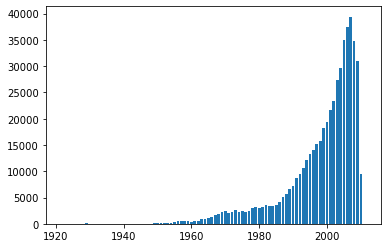

In [5]:
import matplotlib.pyplot as plt
plt.bar(ind,values.values)

In [6]:
from sklearn.decomposition import PCA
pca_data=PCA(n_components=2)
accu=pca_data.fit_transform(audio_input)
accu

array([[-0.1923099 ,  0.06533934],
       [ 0.33158305, -0.08501842],
       [-0.17998727,  0.00853164],
       ...,
       [-0.32234284, -0.01715416],
       [ 0.11394497, -0.05168805],
       [-0.27950106,  0.02618951]])

In [7]:
# from sklearn.model_selection import train_test_split
# accu_train, accu_test, accuOpt_train, accuOpt_test = train_test_split( accu, audio_output,test_size=0.10, random_state=42)

accu_train,accu_test= accu[:463715],accu[463716:]
accuOpt_train, accuOpt_test=audio_output[:463715] ,audio_output[463716:]

In [8]:
import numpy as np
accuOpt_train = accuOpt_train.to_numpy()
accuOpt_train

array([[2001],
       [2001],
       [2001],
       ...,
       [2007],
       [2006],
       [2007]], dtype=int64)

In [ ]:
len(accuOpt_train)

In [9]:
output=[]
for i in range(len(accuOpt_train)):
    output.append(accuOpt_train[i][0])
    

In [10]:
from sklearn import svm
svm_model=svm.SVC()
svm_model.fit(accu_train, output) 

SVC()

In [46]:
predict=svm_model.predict(accu_test)

In [47]:
print(predict)

[2007 2007 2007 ... 2007 2007 2007]


In [48]:

actual=[]
for i in range(len(accuOpt_test)):
    actual.append(accuOpt_test[i][0])
    

In [99]:
from collections import defaultdict
list1=[]
final_dict=defaultdict(int)
for i in range(len(predict)):
    diff=abs(int(predict[i])-int(actual[i]))
    final_dict[diff] +=1
    if diff==0 or diff==1:
        list1.append(predict[i])
        
    

<BarContainer object of 76 artists>

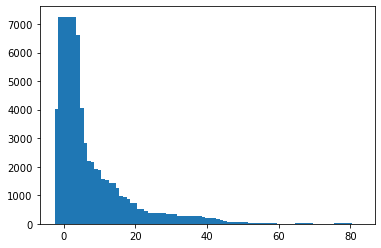

In [100]:
import matplotlib.pyplot as  plt
plt.bar(final_dict.keys(),final_dict.values(),width=5)

In [101]:
final_dict=sorted(final_dict.items())
print(dict(final_dict))

{0: 4021, 1: 7256, 2: 6621, 3: 4043, 4: 2828, 5: 2183, 6: 2158, 7: 1904, 8: 1876, 9: 1585, 10: 1546, 11: 1439, 12: 1430, 13: 1238, 14: 963, 15: 926, 16: 862, 17: 673, 18: 715, 19: 503, 20: 509, 21: 463, 22: 364, 23: 312, 24: 300, 25: 326, 26: 367, 27: 304, 28: 240, 29: 329, 30: 249, 31: 216, 32: 178, 33: 214, 34: 272, 35: 214, 36: 257, 37: 239, 38: 219, 39: 204, 40: 197, 41: 173, 42: 121, 43: 91, 44: 34, 45: 31, 46: 42, 47: 25, 48: 52, 49: 58, 50: 40, 51: 27, 52: 24, 53: 13, 54: 12, 55: 13, 56: 13, 57: 23, 58: 7, 59: 5, 60: 2, 62: 3, 63: 1, 64: 1, 65: 3, 66: 2, 67: 37, 69: 1, 70: 3, 71: 2, 73: 1, 76: 4, 77: 2, 78: 14, 79: 4, 80: 2}


In [102]:
cdf = np.cumsum(list(final_dict1.values()))
cdf

array([29884, 43497, 43558, 47759, 50155, 51321, 51596, 51616, 51629],
      dtype=int32)

In [52]:
# year-(year%10)
a1=[]
p1=[]
for i in range(len(actual)):
    a1.append(actual[i]-(actual[i]%10))
    p1.append(predict[i]-(predict[i]%10))

In [55]:
from collections import defaultdict
list1=[]
final_dict1=defaultdict(int)
for i in range(len(p1)):
    diff=abs(int(p1[i])-int(a1[i]))
    final_dict1[diff] +=1
   

<BarContainer object of 9 artists>

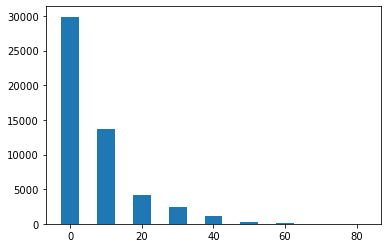

In [88]:
import matplotlib.pyplot as  plt
plt.bar(final_dict1.keys(),final_dict1.values(),width=5)